In [1]:
import geemap
import ee

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# <font color=rgb(135,206,235)> Inicialización y cargar visor </font>

In [3]:
ee.Initialize()

In [4]:
Map = geemap.Map()

In [5]:
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

# <font color=rgb(135,206,235)> Tipo de catalogo </font>

## <font color="skyblue"> TerraClimate: Monthly Climate and Climatic Water Balance for Global Terrestrial Surfaces, University of Idahovv </font>

In [6]:
Catalogo = ee.ImageCollection("IDAHO_EPSCOR/TERRACLIMATE")

Disponibles desde 1958-01-01T00:00:00Z al 2022-12-01T00:00:00 <br>
Resolución temporal de 1 mes por cada imagen

<a href="https://developers.google.com/earth-engine/datasets/catalog/IDAHO_EPSCOR_TERRACLIMATE#bands"> Informacion del catalogo </a>

In [7]:
print("La resolución espacial (en metros) de la colección es: ")
Catalogo.select("soil").first().projection().nominalScale()

La resolución espacial (en metros) de la colección es: 


In [8]:
volcanPurace = geemap.shp_to_ee("volcan/purace.shp")

In [9]:
volcanPurace.getInfo()

{'type': 'FeatureCollection',
 'columns': {'id': 'Integer', 'system:index': 'String'},
 'features': [{'type': 'Feature',
   'geometry': {'geodesic': False,
    'type': 'Polygon',
    'coordinates': [[[-76.43074619933213, 2.3533251799494024],
      [-76.42465140550426, 2.359922289005671],
      [-76.42465140550426, 2.359922289005671],
      [-76.40433542607805, 2.362967098017148],
      [-76.36776666311088, 2.3576386778704816],
      [-76.34237168882812, 2.351295293955397],
      [-76.33602294525743, 2.3452056182661116],
      [-76.3245952068302, 2.3370860094584027],
      [-76.31723066428819, 2.3238915450578745],
      [-76.30275552894699, 2.3005471910240383],
      [-76.2986923330618, 2.2787249492422066],
      [-76.31570696583123, 2.2596936543364574],
      [-76.33627689500027, 2.240915865543668],
      [-76.35989422108322, 2.230511851730468],
      [-76.38681289382295, 2.230511851730468],
      [-76.40865257170613, 2.2396470873224645],
      [-76.43938049058826, 2.252081066412617],


### <font color="#9900FF"> Funciones de recorte y escala de datos </font>

In [10]:
#funcion para recortar imagenes

def cortar(img):
    return img.clip(volcanPurace).copyProperties(img,["system:time_start"])

In [11]:
#Aplicar factor de escala

def escalar(img):
    return img.multiply(0.1).copyProperties(img,["system:time_start"])

In [12]:
Tmax = Catalogo.filterDate("1960-01-01","2022-12-31").filterBounds(volcanPurace).select("tmmx").map(cortar).map(escalar)

In [13]:
Tmin = Catalogo.filterDate("1960-01-01","2022-12-31").filterBounds(volcanPurace).select("tmmn").map(cortar).map(escalar)

### <font color="#9900FF"> Mostrar datos (máximos y mínimos) mediante el uso de reductores </font>

In [14]:
print("Temperatura maxima de los máximos de todo el periodo y todos lo px")
Tmax.max().reduceRegion(**{
  "reducer": ee.Reducer.max(),
  "geometry": volcanPurace,
  "scale": 4638.312116386398,  #Tamaño del px
  "maxPixels": 1e9
})

Temperatura maxima de los máximos de todo el periodo y todos lo px


In [15]:
print("Temperatura mínima de los máximos de todo el periodo y todos lo px")
Tmax.min().reduceRegion(**{
  "reducer": ee.Reducer.min(),
  "geometry": volcanPurace,
  "scale": 4638.312116386398,  #Tamaño del px
  "maxPixels": 1e9
})

Temperatura mínima de los máximos de todo el periodo y todos lo px


In [16]:
print("Temperatura maxima de los mínimos de todo el periodo y todos lo px")
Tmin.max().reduceRegion(**{
  "reducer": ee.Reducer.max(),
  "geometry": volcanPurace,
  "scale": 4638.312116386398,  #Tamaño del px
  "maxPixels": 1e9
})

Temperatura maxima de los mínimos de todo el periodo y todos lo px


In [17]:
print("Temperatura mínima de los mínimos de todo el periodo y todos lo px")
Tmin.min().reduceRegion(**{
  "reducer": ee.Reducer.min(),
  "geometry": volcanPurace,
  "scale": 4638.312116386398,  #Tamaño del px
  "maxPixels": 1e9
})

Temperatura mínima de los mínimos de todo el periodo y todos lo px


### <font color="#9900FF"> Añadir capas al visor </font>

In [18]:
paletaColores = ['#67001f', ' #6a011f', ' #6d0220', ' #700320', ' #730421', ' #760521', ' #790622', ' #7c0722', ' #7f0823', ' #810823', ' #840924', ' #870a24', ' #8a0b25', ' #8d0c25', ' #900d26', ' #930e26', ' #960f27', ' #991027', ' #9c1127', ' #9f1228', ' #a21328', ' #a51429', ' #a81529', ' #ab162a', ' #ae172a', ' #b1182b', ' #b3192c', ' #b41c2d', ' #b61f2e', ' #b72230', ' #b82531', ' #ba2832', ' #bb2a34', ' #bd2d35', ' #be3036', ' #bf3338', ' #c13639', ' #c2383a', ' #c43b3c', ' #c53e3d', ' #c6413e', ' #c84440', ' #c94741', ' #cb4942', ' #cc4c44', ' #ce4f45', ' #cf5246', ' #d05548', ' #d25849', ' #d35a4a', ' #d55d4c', ' #d6604d', ' #d7634f', ' #d86551', ' #da6853', ' #db6b55', ' #dc6e57', ' #dd7059', ' #de735c', ' #df765e', ' #e17860', ' #e27b62', ' #e37e64', ' #e48066', ' #e58368', ' #e6866a', ' #e8896c', ' #e98b6e', ' #ea8e70', ' #eb9172', ' #ec9374', ' #ee9677', ' #ef9979', ' #f09c7b', ' #f19e7d', ' #f2a17f', ' #f3a481', ' #f4a683', ' #f5a886', ' #f5aa89', ' #f5ac8b', ' #f6af8e', ' #f6b191', ' #f6b394', ' #f7b596', ' #f7b799', ' #f7b99c', ' #f8bb9e', ' #f8bda1', ' #f8bfa4', ' #f9c2a7', ' #f9c4a9', ' #f9c6ac', ' #fac8af', ' #facab1', ' #fbccb4', ' #fbceb7', ' #fbd0b9', ' #fcd3bc', ' #fcd5bf', ' #fcd7c2', ' #fdd9c4', ' #fddbc7', ' #fddcc9', ' #fdddcb', ' #fcdecd', ' #fcdfcf', ' #fce0d0', ' #fce2d2', ' #fbe3d4', ' #fbe4d6', ' #fbe5d8', ' #fbe6da', ' #fae7dc', ' #fae8de', ' #fae9df', ' #faeae1', ' #f9ebe3', ' #f9ede5', ' #f9eee7', ' #f9efe9', ' #f9f0eb', ' #f8f1ed', ' #f8f2ef', ' #f8f3f0', ' #f8f4f2', ' #f7f5f4', ' #f7f6f6', ' #f6f7f7', ' #f5f6f7', ' #f3f5f6', ' #f2f5f6', ' #f0f4f6', ' #eff3f5', ' #edf2f5', ' #ecf2f5', ' #eaf1f5', ' #e9f0f4', ' #e7f0f4', ' #e6eff4', ' #e4eef4', ' #e3edf3', ' #e1edf3', ' #e0ecf3', ' #deebf2', ' #ddebf2', ' #dbeaf2', ' #dae9f2', ' #d8e9f1', ' #d7e8f1', ' #d5e7f1', ' #d4e6f1', ' #d2e6f0', ' #d1e5f0', ' #cfe4ef', ' #cce2ef', ' #cae1ee', ' #c7e0ed', ' #c5dfec', ' #c2ddec', ' #c0dceb', ' #bddbea', ' #bbdaea', ' #b8d8e9', ' #b6d7e8', ' #b3d6e8', ' #b1d5e7', ' #aed3e6', ' #acd2e5', ' #a9d1e5', ' #a7d0e4', ' #a5cee3', ' #a2cde3', ' #a0cce2', ' #9dcbe1', ' #9bc9e0', ' #98c8e0', ' #96c7df', ' #93c6de', ' #90c4dd', ' #8dc2dc', ' #8ac0db', ' #87beda', ' #84bcd9', ' #81bad8', ' #7eb8d7', ' #7bb6d6', ' #78b4d5', ' #75b2d4', ' #71b0d3', ' #6eaed2', ' #6bacd1', ' #68abd0', ' #65a9cf', ' #62a7ce', ' #5fa5cd', ' #5ca3cb', ' #59a1ca', ' #569fc9', ' #529dc8', ' #4f9bc7', ' #4c99c6', ' #4997c5', ' #4695c4', ' #4393c3', ' #4291c2', ' #408fc1', ' #3f8ec0', ' #3e8cbf', ' #3c8abe', ' #3b88be', ' #3a87bd', ' #3885bc', ' #3783bb', ' #3681ba', ' #3480b9', ' #337eb8', ' #327cb7', ' #307ab6', ' #2f79b5', ' #2e77b5', ' #2c75b4', ' #2b73b3', ' #2a71b2', ' #2870b1', ' #276eb0', ' #266caf', ' #246aae', ' #2369ad', ' #2267ac', ' #2065ab', ' #1f63a8', ' #1e61a5', ' #1d5fa2', ' #1c5c9f', ' #1b5a9c', ' #1a5899', ' #195696', ' #185493', ' #175290', ' #15508d', ' #144e8a', ' #134c87', ' #124984', ' #114781', ' #10457e', ' #0f437b', ' #0e4179', ' #0d3f76', ' #0c3d73', ' #0a3b70', ' #09386d', ' #08366a', ' #073467', ' #063264', ' #053061']

In [19]:
Map.addLayer(Tmax.max(),{"palette":["red","orange","yellow","green","blue"], "min":11, "max":17},"Temperatura máxima")

In [20]:
Map.addLayer(Tmin.min(),{"palette":paletaColores, "min":-1.3, "max":3.4},"Temperatura mínima")

In [21]:
Map.centerObject(volcanPurace,10) #Centrar mapa

In [22]:
Map

Map(bottom=129699.0, center=[2.296783549149568, -76.38347686228464], controls=(WidgetControl(options=['positio…

### <font color="#9900FF"> Función para estimar la temperatura media mediante el máximo y el mínimo </font>

In [23]:
# De las temperaturas máximas y mínimas vamos a sacar el promedio
def promedio(img):
    maximos = img.select("tmmx").clip(volcanPurace).multiply(0.1)
    minimos = img.select("tmmn").clip(volcanPurace).multiply(0.1)
    promedio = (maximos.add(minimos)).divide(2)
    return promedio.rename("prom").copyProperties(img,["system:time_start"])

In [24]:
Tprom = Catalogo.filterDate("1960-01-01","2022-12-31").filterBounds(volcanPurace).map(promedio)

### <font color="#9900FF"> Mostrar máximos y mínimos del promedio mediante reductores </font>

In [25]:
print("Temperatura maxima de los promedios de todo el periodo y todos lo px")
Tprom.max().reduceRegion(**{
  "reducer": ee.Reducer.max(),
  "geometry": volcanPurace,
  "scale": 4638.312116386398,  #Tamaño del px
  "maxPixels": 1e9
})

Temperatura maxima de los promedios de todo el periodo y todos lo px


In [26]:
print("Temperatura mínima de los promedios de todo el periodo y todos lo px")
Tprom.min().reduceRegion(**{
  "reducer": ee.Reducer.min(),
  "geometry": volcanPurace,
  "scale": 4638.312116386398,  #Tamaño del px
  "maxPixels": 1e9
})

Temperatura mínima de los promedios de todo el periodo y todos lo px


### <font color="#9900FF"> Visulizar temperatura promedio </font>

In [27]:
Map.addLayer(Tprom.mean(),{"palette":paletaColores, "min":4.4, "max":9.6},"Temperaturas promedio multianuales")

In [28]:
Map.set_plot_options(add_marker_cluster=False,
    sample_scale=None,
    plot_type="bar", #"bar", "scatter" or "hist"
    overlay=False,
    position='bottomright',) #Permite al inspector convertir una imagen (al dar click) en grafico de barras para este caso

In [29]:
Map

Map(bottom=129699.0, center=[2.296783549149568, -76.38347686228464], controls=(WidgetControl(options=['positio…

### <font color="#9900FF"> Extraer datos de imagenes </font>

In [30]:
#Función para extraer el promedio de cada imagen de las temperaturas promedio
def Tprom_reductor(img): 
    TpromProm = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=volcanPurace, scale=4638.312116386398).get('prom')
    return img.set('Fecha', img.date().format()).set('Promedio',TpromProm)

In [31]:
Tprom_reducido_imgs = Tprom.map(Tprom_reductor)

In [32]:
anidar_listaTprom = Tprom_reducido_imgs.reduceColumns(ee.Reducer.toList(2), ['Fecha','Promedio']).values().get(0)

In [33]:
df_Tprom = pd.DataFrame(anidar_listaTprom.getInfo(), columns=['Fecha','Promedio'])

In [34]:
df_Tprom

,Fecha,Promedio
0,1960-01-01T00:00:00,7.151292
1,1960-02-01T00:00:00,7.204460
2,1960-03-01T00:00:00,7.026949
3,1960-04-01T00:00:00,7.133743
4,1960-05-01T00:00:00,7.475531
...,...,...
751,2022-08-01T00:00:00,6.829429
752,2022-09-01T00:00:00,6.942163
753,2022-10-01T00:00:00,7.230388
754,2022-11-01T00:00:00,7.233180


In [35]:
df_Tprom['Fecha'] = pd.to_datetime(df_Tprom['Fecha'])

df_Tprom = df_Tprom.set_index('Fecha')

df_Tprom

,Promedio
Fecha,
1960-01-01,7.151292
1960-02-01,7.204460
1960-03-01,7.026949
1960-04-01,7.133743
1960-05-01,7.475531
...,...
2022-08-01,6.829429
2022-09-01,6.942163
2022-10-01,7.230388


In [36]:
#Función para extraer el promedio de cada imagen de las temperaturas maximas
def Tmax_reductor(img): 
    TmaxProm = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=volcanPurace, scale=4638.312116386398).get('tmmx')
    return img.set('Fecha', img.date().format()).set('Promedio',TmaxProm)

In [37]:
Tmax_reducido_imgs = Tmax.map(Tmax_reductor)

In [38]:
anidar_listaTmax = Tmax_reducido_imgs.reduceColumns(ee.Reducer.toList(2), ['Fecha','Promedio']).values().get(0)

In [39]:
df_Tmax = pd.DataFrame(anidar_listaTmax.getInfo(), columns=['Fecha','Promedio'])

In [40]:
df_Tmax

,Fecha,Promedio
0,1960-01-01T00:00:00,12.473447
1,1960-02-01T00:00:00,11.990329
2,1960-03-01T00:00:00,12.221175
3,1960-04-01T00:00:00,12.117007
4,1960-05-01T00:00:00,12.234556
...,...,...
751,2022-08-01T00:00:00,9.882201
752,2022-09-01T00:00:00,10.559733
753,2022-10-01T00:00:00,11.021134
754,2022-11-01T00:00:00,11.352730


In [41]:
df_Tmax['Fecha'] = pd.to_datetime(df_Tmax['Fecha'])

df_Tmax = df_Tmax.set_index('Fecha')

df_Tmax

,Promedio
Fecha,
1960-01-01,12.473447
1960-02-01,11.990329
1960-03-01,12.221175
1960-04-01,12.117007
1960-05-01,12.234556
...,...
2022-08-01,9.882201
2022-09-01,10.559733
2022-10-01,11.021134


In [42]:
#Función para extraer el promedio de cada imagen de las temperaturas minimas
def Tmin_reductor(img): 
    TminProm = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=volcanPurace, scale=4638.312116386398).get('tmmn')
    return img.set('Fecha', img.date().format()).set('Promedio',TminProm)

In [43]:
Tmin_reducido_imgs = Tmin.map(Tmin_reductor)

In [44]:
anidar_listaTmin = Tmin_reducido_imgs.reduceColumns(ee.Reducer.toList(2), ['Fecha','Promedio']).values().get(0)

In [45]:
df_Tmin = pd.DataFrame(anidar_listaTmin.getInfo(), columns=['Fecha','Promedio'])

In [46]:
df_Tmin

,Fecha,Promedio
0,1960-01-01T00:00:00,1.829137
1,1960-02-01T00:00:00,2.418591
2,1960-03-01T00:00:00,1.832722
3,1960-04-01T00:00:00,2.150479
4,1960-05-01T00:00:00,2.716507
...,...,...
751,2022-08-01T00:00:00,3.776657
752,2022-09-01T00:00:00,3.324594
753,2022-10-01T00:00:00,3.439642
754,2022-11-01T00:00:00,3.113631


In [47]:
df_Tmin['Fecha'] = pd.to_datetime(df_Tmin['Fecha'])

df_Tmin = df_Tmin.set_index('Fecha')

df_Tmin

,Promedio
Fecha,
1960-01-01,1.829137
1960-02-01,2.418591
1960-03-01,1.832722
1960-04-01,2.150479
1960-05-01,2.716507
...,...
2022-08-01,3.776657
2022-09-01,3.324594
2022-10-01,3.439642


### <font color="#9900FF"> Gráficos </font>

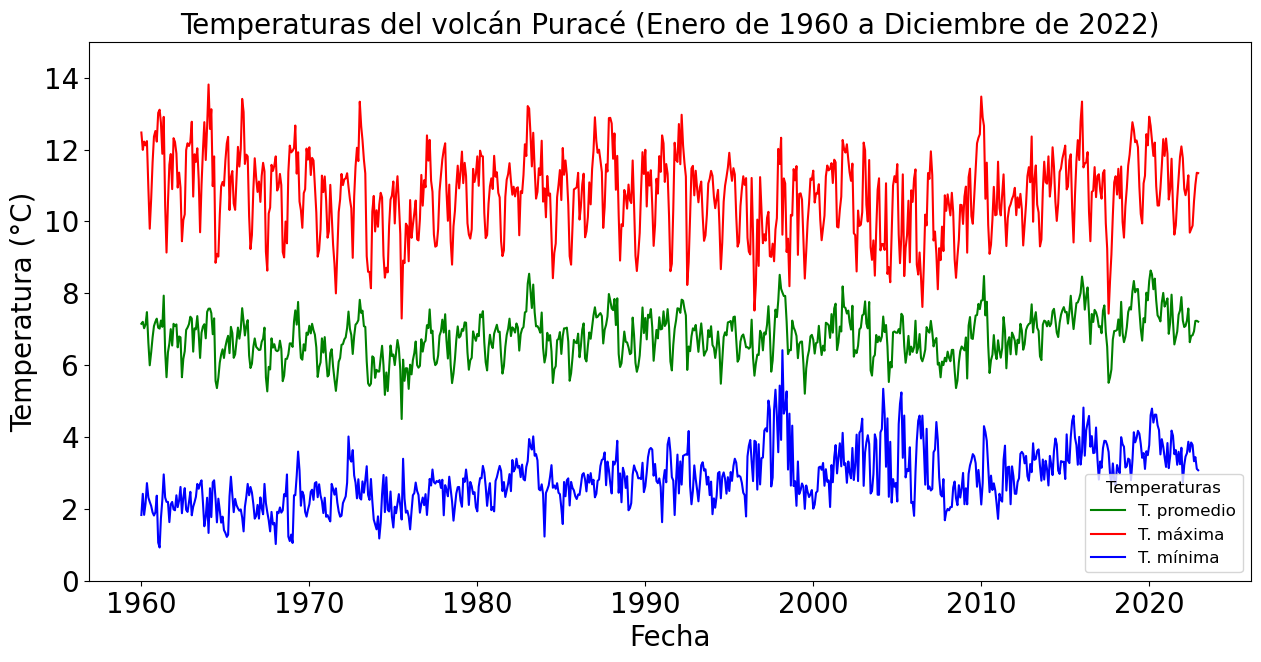

In [48]:
# Gráficos de líneas con dimensiones de 15 x 7

fig, ax = plt.subplots(figsize=(15,7))

sns.lineplot(data=df_Tprom, ax=ax, palette =["g"], legend=False,label="T. promedio")
sns.lineplot(data=df_Tmax, ax=ax, palette =["r"], legend=False,label="T. máxima")
sns.lineplot(data=df_Tmin, ax=ax, palette =["b"], legend=False,label="T. mínima")

ax.legend(title="Temperaturas",title_fontsize=12,fontsize=12, loc="lower right")
ax.tick_params(axis='both', which='major', labelsize=20) 
ax.set_ylabel('Temperatura (°C)',fontsize=20)
ax.set_xlabel('Fecha',fontsize=20)
ax.set_ylim((0,15))
ax.set_title('Temperaturas del volcán Puracé (Enero de 1960 a Diciembre de 2022)',fontsize=20);

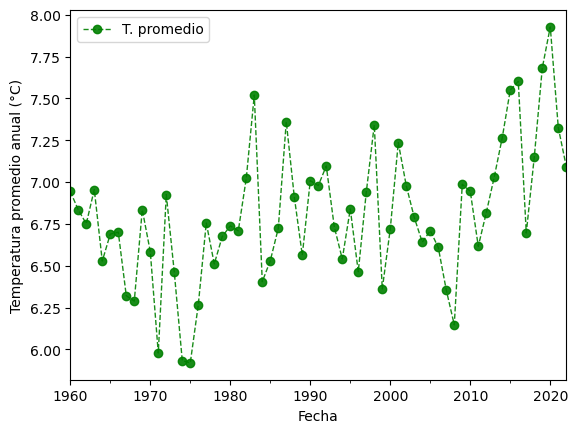

In [49]:
df_Tprom.groupby(pd.Grouper(freq='Y')).mean().plot(legend=False,
                                                   ylabel="Temperatura promedio anual (°C)",
                                                   color="g", alpha=0.9, style="--", lw=1,
                                                  marker="o")
plt.legend(["T. promedio"])
plt.show()

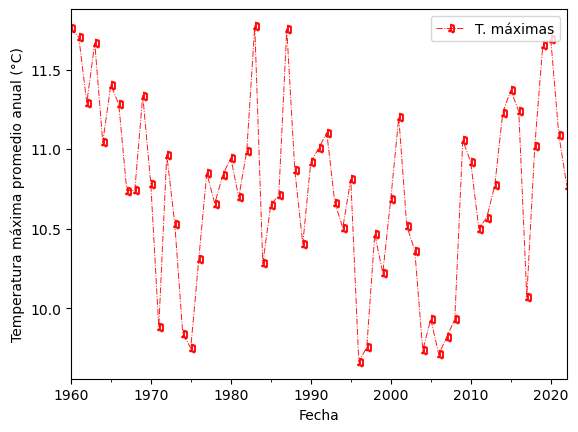

In [50]:
df_Tmax.groupby(pd.Grouper(freq='Y')).mean().plot(legend=False,
                                                   ylabel="Temperatura máxima promedio anual (°C)",
                                                   color="r", alpha=0.9, style="-.", lw=.7,
                                                 marker="$\u266B$")
plt.legend(["T. máximas"])
plt.show()

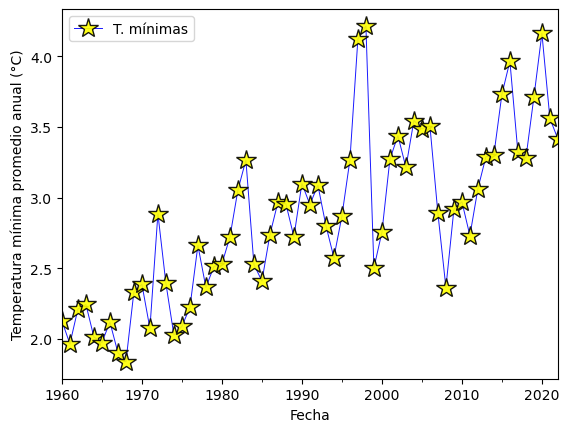

In [51]:
df_Tmin.groupby(pd.Grouper(freq='Y')).mean().plot(legend=False,
                                                   ylabel="Temperatura mínima promedio anual (°C)",
                                                   color="b", alpha=0.9, style="-", lw=.7,
                                                  marker="*",markersize=15,markerfacecolor='yellow',
                                                 markerfacecoloralt='green',markeredgecolor='black',
                                                 markeredgewidth=1)
plt.legend(["T. mínimas"])
plt.show()

In [52]:
#Estilos de lineas

#https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html

In [53]:
#Esilos marcadores

#https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html

In [54]:
# Frecuencias acronimos
"""
Alias    Description
B        business day frequency
C        custom business day frequency
D        calendar day frequency
W        weekly frequency
M        month end frequency
SM       semi-month end frequency (15th and end of month)
BM       business month end frequency
CBM      custom business month end frequency
MS       month start frequency
SMS      semi-month start frequency (1st and 15th)
BMS      business month start frequency
CBMS     custom business month start frequency
Q        quarter end frequency
BQ       business quarter end frequency
QS       quarter start frequency
BQS      business quarter start frequency
A, Y     year end frequency
BA, BY   business year end frequency
AS, YS   year start frequency
BAS, BYS business year start frequency
BH       business hour frequency
H        hourly frequency
T, min   minutely frequency
S        secondly frequency
L, ms    milliseconds
U, us    microseconds
N        nanoseconds
"""

'\nAlias    Description\nB        business day frequency\nC        custom business day frequency\nD        calendar day frequency\nW        weekly frequency\nM        month end frequency\nSM       semi-month end frequency (15th and end of month)\nBM       business month end frequency\nCBM      custom business month end frequency\nMS       month start frequency\nSMS      semi-month start frequency (1st and 15th)\nBMS      business month start frequency\nCBMS     custom business month start frequency\nQ        quarter end frequency\nBQ       business quarter end frequency\nQS       quarter start frequency\nBQS      business quarter start frequency\nA, Y     year end frequency\nBA, BY   business year end frequency\nAS, YS   year start frequency\nBAS, BYS business year start frequency\nBH       business hour frequency\nH        hourly frequency\nT, min   minutely frequency\nS        secondly frequency\nL, ms    milliseconds\nU, us    microseconds\nN        nanoseconds\n'

<Axes: ylabel='Frequency'>

<Figure size 640x480 with 0 Axes>

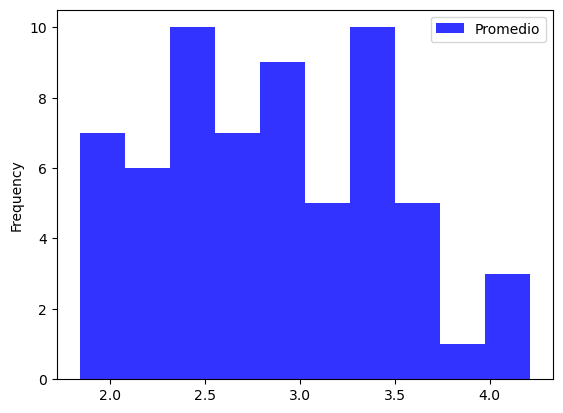

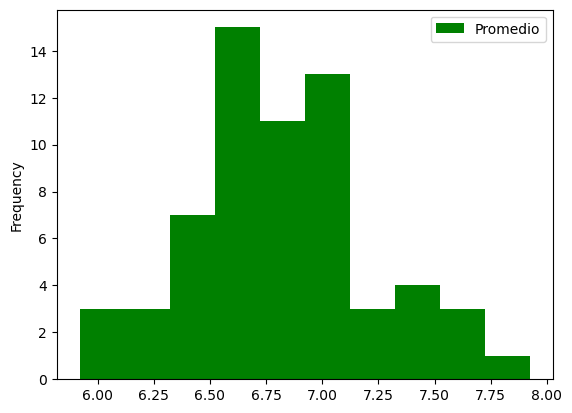

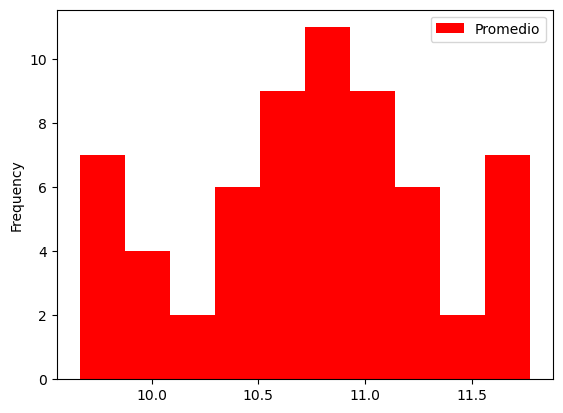

In [55]:
plt.figure();

df_Tmin.groupby(pd.Grouper(freq='Y')).mean().plot.hist(color="b", alpha=0.8)
df_Tprom.groupby(pd.Grouper(freq='Y')).mean().plot.hist(color="g")
df_Tmax.groupby(pd.Grouper(freq='Y')).mean().plot.hist(color="r")

In [56]:
#Guía para gráficos con pandas
#https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

In [57]:
#Vamos a crear la columna de años y meses para las temperaturas mínimas
df_Tmin["años"] = np.array(df_Tmin.index.year)

In [58]:
df_Tmin.head()

,Promedio,años
Fecha,,
1960-01-01,1.829137,1960
1960-02-01,2.418591,1960
1960-03-01,1.832722,1960
1960-04-01,2.150479,1960
1960-05-01,2.716507,1960


In [59]:
df_Tmin["meses"] = np.array(df_Tmin.index.month)

In [60]:
df_Tmin

,Promedio,años,meses
Fecha,,,
1960-01-01,1.829137,1960,1
1960-02-01,2.418591,1960,2
1960-03-01,1.832722,1960,3
1960-04-01,2.150479,1960,4
1960-05-01,2.716507,1960,5
...,...,...,...
2022-08-01,3.776657,2022,8
2022-09-01,3.324594,2022,9
2022-10-01,3.439642,2022,10


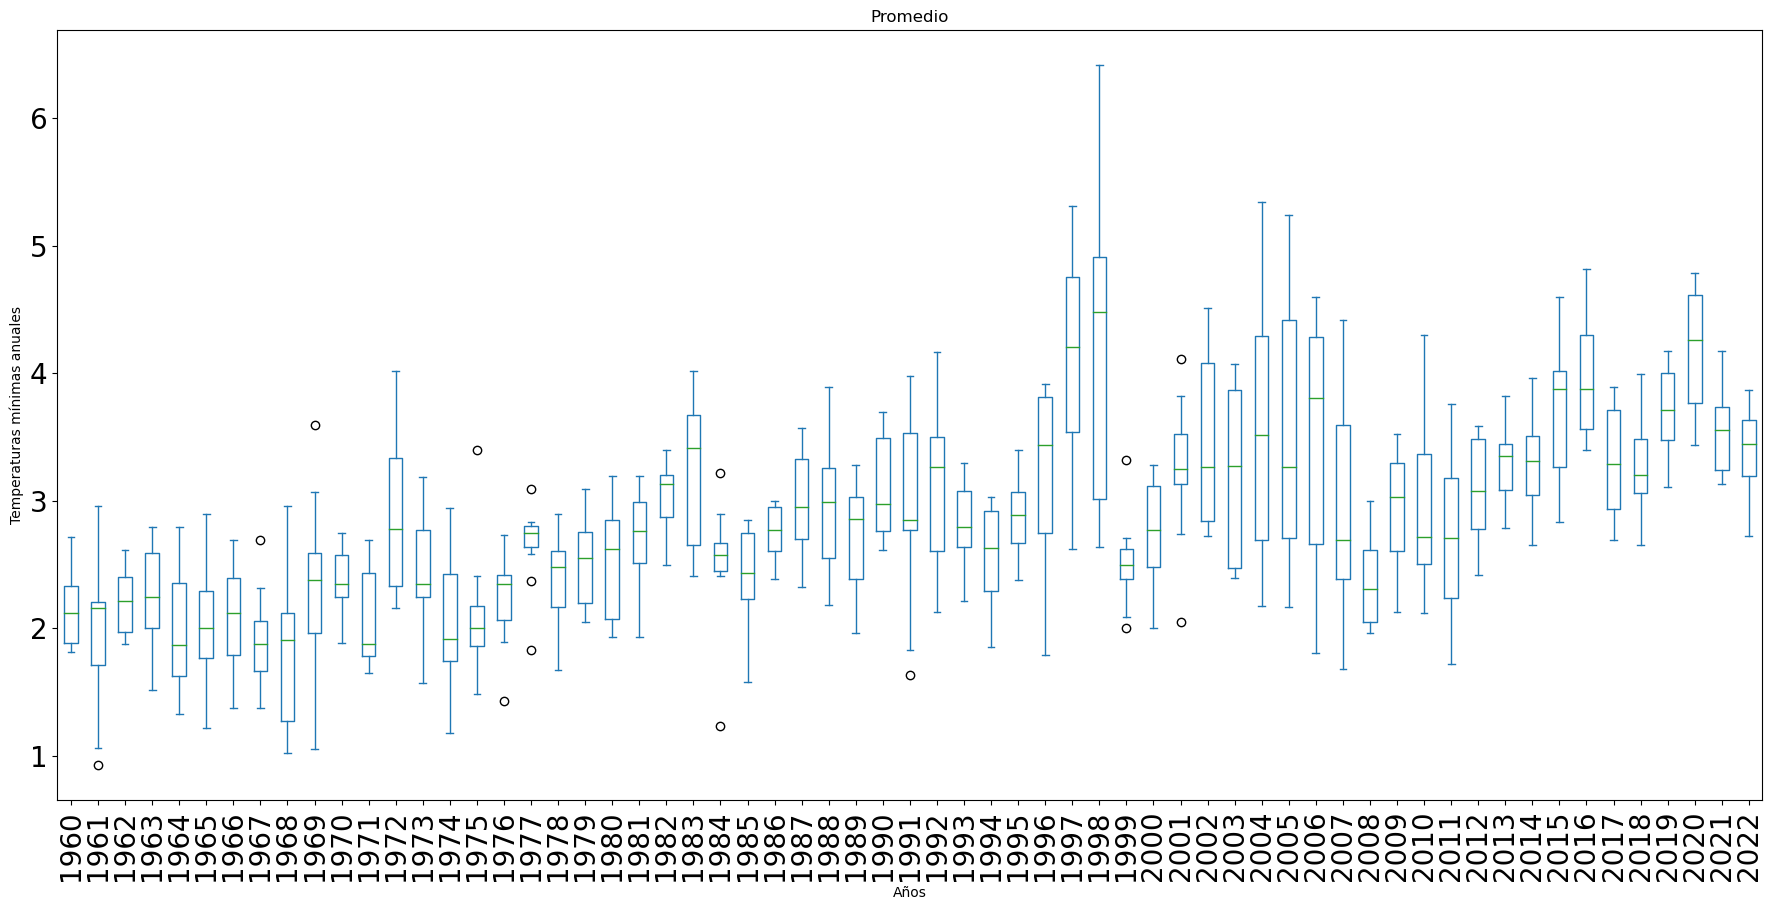

In [61]:
df_Tmin.plot.box(by="años", column=["Promedio"],figsize=(22,10), fontsize=20, 
                 ylabel="Temperaturas mínimas anuales", xlabel="Años", rot=90)
plt.show()

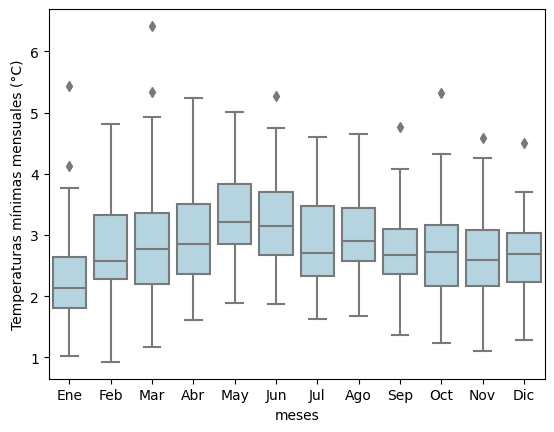

In [62]:
fig, ax = plt.subplots()
sns.boxplot(data=df_Tmin, x="meses", y="Promedio", palette=["lightblue"])
ax.set_xticklabels(["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"])
ax.set_ylabel("Temperaturas mínimas mensuales (°C)")
plt.show()

In [63]:
#Link tutorial graficos
# https://www.youtube.com/watch?v=3qfc8YPAugcs